# PCA & unsupervised learning
This lab asks you to create an unsupervised model on the breast cancer dataset where the targeted class is in the Diagnosis column (M = malignant, B = benign).

Task 1: Create a 2D visualization on the dataset where you apply the PCA method to reduce the feature into 2 dimensions and plot it on a graph. Then, label the Diagnosis column with different colors.


Task 2: Create a k-mean model where k = 2 on the dataset. Then, visualize it the same way as in task 1, but apply the color with the predicted class.  

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import sklearn.metrics as metrics
from sklearn import preprocessing
!gdown 1NNu6rF6AYUXsMlHjApMwGHbT7HxFTu5m

df = pd.read_csv("/content/Breast_Cancer_Wisconsin.csv")
df = df.iloc[:,:-1]
print(df.info())
print(df["diagnosis"].value_counts())
df.head()


Downloading...
From: https://drive.google.com/uc?id=1NNu6rF6AYUXsMlHjApMwGHbT7HxFTu5m
To: /content/Breast_Cancer_Wisconsin.csv
100% 125k/125k [00:00<00:00, 53.8MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Task 1

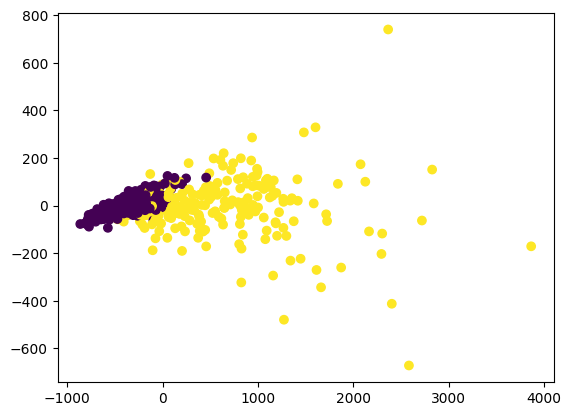

In [52]:
from sklearn.decomposition import PCA
df_c = df.copy()
X = df_c.drop(["diagnosis","id"],axis =1)
y = df["diagnosis"]

pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
le = preprocessing.LabelEncoder()
y= le.fit_transform(y)

plt.scatter(X[:,0],X[:,1],c=y)

#Task 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


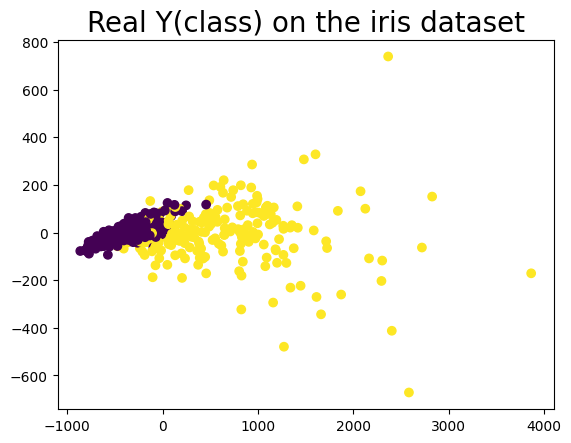

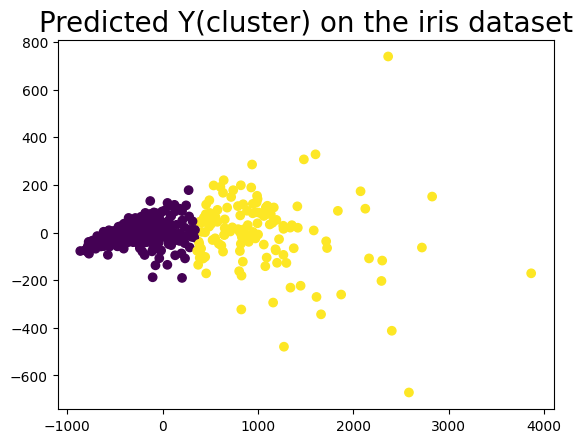

              precision    recall  f1-score   support

           0       1.00      0.81      0.90       438
           1       0.61      0.99      0.76       131

    accuracy                           0.85       569
   macro avg       0.81      0.90      0.83       569
weighted avg       0.91      0.85      0.86       569



In [53]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(X.data)
all_predictions = model.predict(X.data)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Real Y(class) on the iris dataset', size=20)
plt.show()

plt.scatter(X[:,0], X[:,1], c=all_predictions)
plt.title('Predicted Y(cluster) on the iris dataset', size=20)
plt.show()


print(classification_report(all_predictions, y))